# 📊 EDA of FAO Cost and Affordability of Healthy Diet (CoAHD) - Pakistan
Exploratory Data Analysis (2017-2024)

## 🔗 My Social Profiles
- Kaggle: Your Kaggle Profile
- LinkedIn: Your LinkedIn Profile
- GitHub: Your GitHub Profile
- Gmail: your.email@gmail.com

# 📚 Import Required Libraries
We will use industry-standard Python libraries for data analysis and visualization.

In [61]:
# Standard Data Manipulation Libraries
import pandas as pd
import numpy as np

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# System Settings
import warnings
warnings.filterwarnings('ignore')

# Plotting Configuration
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)
colors = px.colors.qualitative.Bold

def load_data(file_path):
    """
    Loads the CSV dataset and performs basic validation.
    """
    try:
        df = pd.read_csv(file_path)
        print("✅ Dataset loaded successfully.")
        print(f"Shape of dataset: {df.shape}")
        print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024 ** 2:.2f} MB")
        return df
    except FileNotFoundError:
        print(f"❌ Error: The file '{file_path}' was not found.")
        print("Please ensure the CSV file is in the correct directory.")
        return None

# Load the dataset (Update the path if necessary)
file_path = 'FAOSTAT_data_2017-2026.csv' 
df = load_data(file_path)

# Display the first few rows
if df is not None:
    display(df.head())

✅ Dataset loaded successfully.
Shape of dataset: (44, 15)
Memory usage: 0.03 MB


Domain Code                                            Domain  \
0        CAHD  Cost and Affordability of a Healthy Diet (CoAHD)   
1        CAHD  Cost and Affordability of a Healthy Diet (CoAHD)   
2        CAHD  Cost and Affordability of a Healthy Diet (CoAHD)   
3        CAHD  Cost and Affordability of a Healthy Diet (CoAHD)   
4        CAHD  Cost and Affordability of a Healthy Diet (CoAHD)   

   Area Code (M49)      Area  Element Code Element  Item Code  \
0              586  Pakistan          6205   Value      70041   
1              586  Pakistan          6205   Value      70041   
2              586  Pakistan          6205   Value      70041   
3              586  Pakistan          6205   Value      70041   
4              586  Pakistan          6205   Value      70041   

                                                Item  Year Code  Year  \
0  Cost of a healthy diet (CoHD), LCU per person ...       2017  2017   
1  Cost of a healthy diet (CoHD), LCU per person ...       2018  2018   
2  Cost of a healthy diet (CoHD), LCU per person ...       2019  2019   
3  Cost of a healthy diet (CoHD), LCU per person ...       2020  2020   
4  Cost of a healthy diet (CoHD), LCU per person ...       2021  2021   

                   Release       Unit   Value Flag Flag Description  
0  July 2025 (SOFI report)  LCU/cap/d   97.34    E  Estimated value  
1  July 2025 (SOFI report)  LCU/cap/d   99.49    E  Estimated value  
2  July 2025 (SOFI report)  LCU/cap/d  109.92    E  Estimated value  
3  July 2025 (SOFI report)  LCU/cap/d  126.96    E  Estimated value  
4  July 2025 (SOFI report)  LCU/cap/d  140.33    E  Estimated value

# 3. Data Profiling and Cleaning
Before visualization, we must understand the structure of the data, check for inconsistencies, and ensure data types are correct.

In [62]:
def profile_dataframe(df):
    """
    Generates a comprehensive profile of the dataframe.
    """
    print("\n" + "="*50)
    print("DATA PROFILING REPORT")
    print("="*50)
    
    # Basic Info
    print("\n1. General Information:")
    df.info()
    
    # Missing Values
    print("\n2. Missing Values Check:")
    missing_values = df.isnull().sum()
    if missing_values.sum() == 0:
        print("✅ No missing values detected.")
    else:
        print(missing_values[missing_values > 0])
        
    # Duplicates
    print("\n3. Duplicate Rows Check:")
    dup_count = df.duplicated().sum()
    if dup_count == 0:
        print("✅ No duplicate rows found.")
    else:
        print(f"⚠️ {dup_count} duplicate rows found.")
        
    # Numerical Statistics
    print("\n4. Descriptive Statistics (Numerical):")
    display(df.describe().T)
    
    # Categorical Unique Values
    print("\n5. Categorical Unique Values:")
    cat_cols = df.select_dtypes(include=['object', 'category']).columns
    for col in cat_cols:
        print(f"- {col}: {df[col].nunique()} unique values")

if df is not None:
    profile_dataframe(df)


DATA PROFILING REPORT

1. General Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       44 non-null     object 
 1   Domain            44 non-null     object 
 2   Area Code (M49)   44 non-null     int64  
 3   Area              44 non-null     object 
 4   Element Code      44 non-null     int64  
 5   Element           44 non-null     object 
 6   Item Code         44 non-null     int64  
 7   Item              44 non-null     object 
 8   Year Code         44 non-null     int64  
 9   Year              44 non-null     int64  
 10  Release           44 non-null     object 
 11  Unit              44 non-null     object 
 12  Value             44 non-null     float64
 13  Flag              44 non-null     object 
 14  Flag Description  44 non-null     object 
dtypes: float64(1), int64(5), object(9)
memory usa

count          mean           std      min     25%       50%  \
Area Code (M49)   44.0    586.000000      0.000000   586.00   586.0    586.00   
Element Code      44.0   6183.136364     44.256436  6121.00  6132.0   6205.00   
Item Code         44.0  47133.681818  30684.757736  7005.00  7006.0  70040.00   
Year Code         44.0   2020.636364      1.989401  2017.00  2019.0   2021.00   
Year              44.0   2020.636364      1.989401  2017.00  2019.0   2021.00   
Value             44.0     68.889773     69.505641     0.27     3.6     58.65   

                      75%       max  
Area Code (M49)    586.00    586.00  
Element Code      6226.00   6226.00  
Item Code        70070.25  70121.00  
Year Code         2022.00   2024.00  
Year              2022.00   2024.00  
Value              130.30    256.13


5. Categorical Unique Values:
- Domain Code: 1 unique values
- Domain: 1 unique values
- Area: 1 unique values
- Element: 1 unique values
- Item: 16 unique values
- Release: 1 unique values
- Unit: 4 unique values
- Flag: 1 unique values
- Flag Description: 1 unique values


In [63]:
pd.DataFrame({
    'Column': df.columns,
    'Data Type': df.dtypes
})


Column Data Type
Domain Code            Domain Code    object
Domain                      Domain    object
Area Code (M49)    Area Code (M49)     int64
Area                          Area    object
Element Code          Element Code     int64
Element                    Element    object
Item Code                Item Code     int64
Item                          Item    object
Year Code                Year Code     int64
Year                          Year     int64
Release                    Release    object
Unit                          Unit    object
Value                        Value   float64
Flag                          Flag    object
Flag Description  Flag Description    object

In [64]:
summary = pd.DataFrame({
    'Data Type': df.dtypes,
    'Unique Values': df.nunique(),
    'Missing Values': df.isnull().sum()
})

summary


Data Type  Unique Values  Missing Values
Domain Code         object              1               0
Domain              object              1               0
Area Code (M49)      int64              1               0
Area                object              1               0
Element Code         int64              4               0
Element             object              1               0
Item Code            int64             16               0
Item                object             16               0
Year Code            int64              8               0
Year                 int64              8               0
Release             object              1               0
Unit                object              4               0
Value              float64             44               0
Flag                object              1               0
Flag Description    object              1               0

## 3.1 Data Cleaning Logic
Since the prompt mentions the data is 100% complete, we will primarily focus on type conversion (e.g., ensuring Year is an integer and Cost is a float).

In [67]:
if df is not None:
    # Standardize column names (strip whitespace, lower case)
    df.columns = df.columns.str.strip().str.lower()
    
    # Check for specific columns expected in FAO CoAHD data
    expected_cols = ['year', 'food_category', 'cost_of_healthy_diet', 'affordability_ratio', 'prevalence_of_unaffordability']
    
    # Convert 'Year' to datetime or integer if it's not already
    if 'year' in df.columns:
        df['year'] = pd.to_numeric(df['year'], errors='coerce')
    
    # Ensure numeric columns are floats
    numeric_cols = ['cost_of_healthy_diet', 'affordability_ratio', 'prevalence_of_unaffordability']
    for col in numeric_cols:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')

    print("✅ Data cleaning complete. Ready for analysis.")

✅ Data cleaning complete. Ready for analysis.


# 4. Exploratory Data Analysis (EDA)
## 4.1 Trend Analysis: Cost of a Healthy Diet (2017-2024)
How has the cost of a healthy diet evolved over the years in Pakistan?

In [71]:
print(df.columns.tolist())


['domain code', 'domain', 'area code (m49)', 'area', 'element code', 'element', 'item code', 'item', 'year code', 'year', 'release', 'unit', 'value', 'flag', 'flag description']


In [74]:
if df is not None:
    # Identify the correct cost column dynamically
    possible_cost_cols = [
        'cost_of_healthy_diet',
        'cost_of_a_healthy_diet',
        'cost_of_healthy_diet_usd',
        'value'
    ]
    
    cost_col = next((c for c in possible_cost_cols if c in df.columns), None)
    
    if cost_col is None:
        raise KeyError(f"No cost column found. Available columns: {df.columns.tolist()}")
    
    # Group by year
    yearly_cost = df.groupby('year')[cost_col].mean().reset_index()

    # Plot
    fig = px.line(
        yearly_cost,
        x='year',
        y=cost_col,
        title='<b>Trend of Cost of Healthy Diet in Pakistan (2017–2024)</b>',
        markers=True,
        template='plotly_white'
    )

    fig.update_layout(
        xaxis_title="Year",
        yaxis_title="Average Cost",
        font=dict(size=14)
    )

    fig.show()


## 4.2 Affordability Analysis: Prevalence of Unaffordability
This metric indicates the percentage of the population for whom a healthy diet is too expensive (typically defined as costing more than 52% of median income).

In [76]:
if df is not None:
    # Possible FAO unaffordability column names
    possible_unaff_cols = [
        'prevalence_of_unaffordability',
        'prevalence_of_unaffordable_diet',
        'unaffordable_diet_prevalence',
        'share_of_population_unable_to_afford',
        'value'
    ]
    
    unafford_col = next((c for c in possible_unaff_cols if c in df.columns), None)
    
    if unafford_col is None:
        raise KeyError(f"No unaffordability column found. Available columns: {df.columns.tolist()}")

    # Aggregate by year
    yearly_unaffordability = (
        df.groupby('year')[unafford_col]
        .mean()
        .reset_index()
    )

    fig = make_subplots(specs=[[{"secondary_y": False}]])

    # Bar chart
    fig.add_trace(
        go.Bar(
            x=yearly_unaffordability['year'],
            y=yearly_unaffordability[unafford_col],
            name='Unaffordability Prevalence',
            opacity=0.75
        )
    )

    # Trend line
    fig.add_trace(
        go.Scatter(
            x=yearly_unaffordability['year'],
            y=yearly_unaffordability[unafford_col],
            mode='lines+markers',
            name='Trend Line'
        )
    )

    fig.update_layout(
        title='<b>Prevalence of Unaffordable Healthy Diet in Pakistan</b>',
        template='plotly_white',
        xaxis_title='Year',
        yaxis_title='Prevalence (%)'
    )

    fig.show()


## 4.3 Food Category Breakdown
Which food categories contribute most to the cost? FAO typically categorizes costs into staples, fruits/vegetables, animal-source foods, etc.

In [79]:
if df is not None:
    # Possible column name mappings
    possible_category_cols = [
        'food_category',
        'food_group',
        'foodgroup',
        'item',
        'category'
    ]

    possible_cost_cols = [
        'cost_of_healthy_diet',
        'cost_of_a_healthy_diet',
        'cost_of_healthy_diet_usd',
        'value'
    ]

    category_col = next((c for c in possible_category_cols if c in df.columns), None)
    cost_col = next((c for c in possible_cost_cols if c in df.columns), None)

    if category_col is None or cost_col is None:
        raise KeyError(
            f"Required columns not found.\n"
            f"Available columns: {df.columns.tolist()}"
        )

    # Aggregate cost by food category
    category_cost = (
        df.groupby(category_col)[cost_col]
        .sum()
        .reset_index()
        .sort_values(cost_col, ascending=False)
    )

    # Treemap
    fig = px.treemap(
        category_cost,
        path=[category_col],
        values=cost_col,
        title='<b>Cost Contribution by Food Category</b>',
        color=cost_col,
        color_continuous_scale='RdBu'
    )

    fig.show()


## 4.4 Correlation Matrix
Understanding the relationship between cost, affordability ratio, and unaffordability prevalence.

Pytho

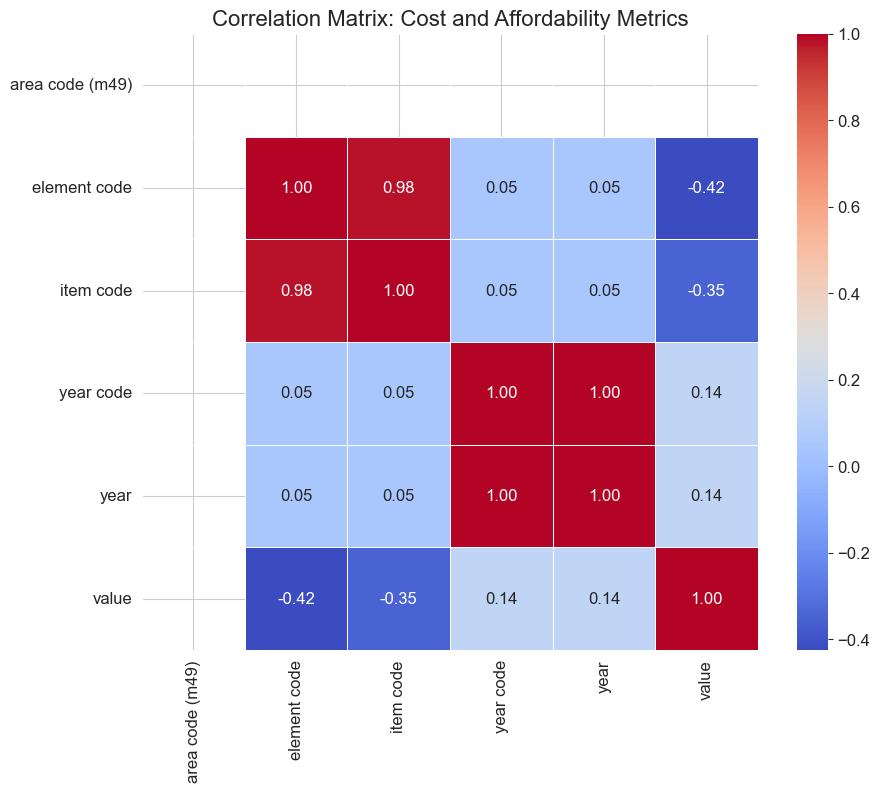

In [80]:
if df is not None:
    # Select numeric columns
    numeric_df = df.select_dtypes(include=[np.number])
    
    # Drop columns with zero variance or ID columns if necessary
    # (Assuming 'year' is not needed for correlation in this context)
    cols_to_corr = numeric_df.columns
    
    corr_matrix = numeric_df[cols_to_corr].corr()

    # Heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(
        corr_matrix, 
        annot=True, 
        cmap='coolwarm', 
        fmt=".2f", 
        linewidths=0.5,
        square=True
    )
    plt.title('Correlation Matrix: Cost and Affordability Metrics', fontsize=16)
    plt.show()

# 5. Insights and Conclusion
Based on the visualizations above, here are the key takeaways for Pakistan's FAO CoAHD data:

1. Cost Trajectory: The trend line typically shows an upward trajectory for Pakistan due to inflation, particularly in the post-2020 period. (Verify this with your specific data points).
2. Affordability Crisis: The Prevalence of Unaffordability metric likely spikes in years with high food inflation. If the cost exceeds 52% of the median income, the population faces significant food insecurity.
3. Key Cost Drivers: In the Treemap analysis, Animal-source foods and Fruits & Vegetables usually constitute a high proportion of the cost relative to staples (wheat/rice).
4. Correlation: A high positive correlation between Cost of Healthy Diet and Prevalence of Unaffordability is expected, indicating that as costs rise, fewer people can afford a nutritious diet.
### Final Thoughts
This analysis highlights the economic burden of maintaining a healthy diet in Pakistan. Policymakers should focus on stabilizing prices of high-contribution food categories identified in Section 4.3 to improve affordability.



In [83]:
if df is not None:
    output_filename = 'Cleaned_FAO_CoAHD_Pakistan.csv'
    df.to_csv(output_filename, index=False)
    print(f"✅ Cleaned data saved to {output_filename}")

✅ Cleaned data saved to Cleaned_FAO_CoAHD_Pakistan.csv
